In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

#### Simulation

In [2]:
# Mu = 0
res = RBA_result(biom_id=None)
res.load_from_json('../output/batch/results/mu_0/RBA_result.json')
glc0 = -res.metabolic_flux['EX_glc__D_e']

In [3]:
reslist = []

# Batch
flist = ['vglc_0_5', 'vglc_1_0', 'vglc_2_0', 'vglc_3_0', 'vglc_4_0', 'vglc_5_0',
         'vglc_6_0', 'vglc_7_0', 'vglc_8_0', 'vglc_9_0', 'vglc_10_0', 'vglc_11_0',
         'vglc_11_5', 'vglc_11_6', 'vglc_11_7', 'vglc_12_0', 'vglc_12_1', 'vglc_12_2']
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch_mitono_ribono/results_capacitycorrected/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
flist = ['vglc_12_3', 'vglc_12_4', 'vglc_12_5', 'vglc_12_9',
         'vglc_13_0', 'vglc_14_0', 'vglc_15_0', 'vglc_16_0', 'vglc_17_0',
         'vglc_20_0', 'vglc_21_0', 'vglc_22_0', 'vglc_23_0', 'vglc_24_0', 'vglc_25_0',
         'vglc_30_0', 'vglc_31_0', 'vglc_32_0', 'vglc_33_0', 'vglc_34_0', 'vglc_35_0']
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch_mitono_ribono/results/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
glcs = [glc0] + [-res.metabolic_flux['EX_glc__D_e'] for res in reslist]
etohs = [0] + []
for res in reslist:
    if 'EX_etoh_e' in res.metabolic_flux.keys():
        etohs.append(res.metabolic_flux['EX_etoh_e'])
    else:
        etohs.append(0)
grs = [0] + [res.growth_rate for res in reslist]
rcap = [0] + [res.ribo_capacity_usage for res in reslist]
pcap = [0] + [res.proteome_capacity_usage for res in reslist]

#### Data

In [4]:
df_data = pd.read_excel('./experimental_clim_batch.xlsx')
glcs_data = df_data['Glucose uptake rate (mmol/gDW/h)'].to_list()
grs_data = df_data['GR_expmt (1/h)'].to_list()
etohs_data = df_data['Ethanol (mmol/gDW/h)'].to_list()

#### Plot

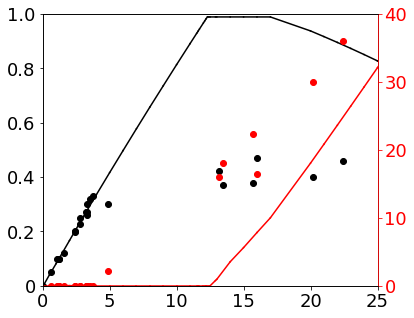

In [5]:
fig,ax1 = plt.subplots(figsize=(6,5))
ax2 = ax1.twinx()

# Plot model-predicted growth rates
N = len(glcs)
for i in range(0,N-1):
    p1 = [glcs[i], glcs[i+1]]; p2 = [grs[i], grs[i+1]]
    line = mlines.Line2D(p1, p2, color='k', linestyle='-')
    ax1.add_line(line);
ax1.set_xlim(0,16);
ax1.set_ylim(0,0.6);

# Plot model-predicted ethanol secretion rates
N = len(glcs)
for i in range(0,N-1):
    p1 = [glcs[i], glcs[i+1]]; p2 = [etohs[i], etohs[i+1]]
    line = mlines.Line2D(p1, p2, color='r', linestyle='-')
    ax2.add_line(line);
ax2.set_xlim(0,16);
ax2.set_ylim(0,25);

# Plot experimentally observed growth rates
ax1.scatter(glcs_data, grs_data, color='k', zorder=2)

# Plot experimentally observed ethanol secretion rates
ax2.scatter(glcs_data[:-1], etohs_data[:-1], color='r', zorder=1)

#ax1.set_xlabel('Glucose uptake rate (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);
#ax1.set_ylabel('Growth rate (h$^{-1}$)', fontsize=16);
#ax2.set_ylabel('Ethanol secretion rate\n(mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);

ax1.set_xlim(0,25)
xticks = [0,5,10,15,20,25]
ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks, fontsize=18);

y1ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax1.set_yticks(y1ticks);
ax1.set_yticklabels(y1ticks, fontsize=18);

y2ticks = [0, 10, 20, 30, 40]
ax2.set_yticks(y2ticks);
ax2.set_yticklabels(y2ticks, fontsize=18);

ax1.spines['left'].set_color('k')
ax1.tick_params(axis='y', colors='k')
ax2.spines['left'].set_color('k')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')

#ax1.spines['top'].set_visible(False)
#ax2.spines['top'].set_visible(False)

# Exhausted capacity line
#line = mlines.Line2D([6, 6], [-0.1, 1.1], color='#2962ff', linestyle='--', zorder=0)
#ax1.add_line(line);

# Legends
"""colors = ['k', 'r']
handles = [mlines.Line2D([], [], color=c, lw=2, ls='-') for c in colors]
legend_labels = ['     Growth', '     Ethanol']
ax1.legend(handles, legend_labels, ncol=1, loc='lower right', fontsize=14);
ax2.scatter(12.8, 3.9, color='k'); ax2.text(12.15, 3.3, '/', fontsize=20);
ax2.scatter(12.8, 1.85, color='r'); ax2.text(12.15, 1.25, '/', fontsize=20);""";

#plt.savefig('../../../scRBA_figures/components/crabtree/ethanol_overflow_mitono_ribono.png', transparent=True, bbox_inches='tight')

In [6]:
max(grs)

0.989188305358886